# <div style="text-align: center; background-color:black; font-family:Georgia, serif; color: green; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Product Classification and Clustering</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-classification-and-clustering/pricerunner_aggregate.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/product-classification-and-clustering/pricerunner_aggregate.csv')

In [4]:
data

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product ID,35311.0,26150.800176,13498.191220,1.0,14958.5,27614.0,37508.5,47358.0
Merchant ID,35311.0,120.501883,117.045557,1.0,17.0,75.0,253.0,371.0
Cluster ID,35311.0,30110.687633,18410.265642,1.0,6123.0,40630.0,44059.0,47525.0
Category ID,35311.0,2618.142930,3.600708,2612.0,2615.0,2619.0,2622.0,2623.0


In [7]:
data.describe(include='all')

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
count,35311.000000,35311,35311.000000,35311.000000,35311,35311.000000,35311
unique,NaN,30993,NaN,NaN,12849,NaN,10
top,NaN,washing machine,NaN,NaN,Canon IXUS 185,NaN,Fridge Freezers
freq,NaN,90,NaN,NaN,27,NaN,5501
mean,26150.800176,NaN,120.501883,30110.687633,NaN,2618.142930,NaN
std,13498.191220,NaN,117.045557,18410.265642,NaN,3.600708,NaN
min,1.000000,NaN,1.000000,1.000000,NaN,2612.000000,NaN
25%,14958.500000,NaN,17.000000,6123.000000,NaN,2615.000000,NaN
50%,27614.000000,NaN,75.000000,40630.000000,NaN,2619.000000,NaN
75%,37508.500000,NaN,253.000000,44059.000000,NaN,2622.000000,NaN


In [8]:
data.isnull().sum()

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

In [9]:
# checking unique values
for i in data.columns:
    print(i,':',data[i].nunique())

Product ID : 35311
Product Title : 30993
 Merchant ID : 306
 Cluster ID : 13233
 Cluster Label : 12849
 Category ID : 10
 Category Label : 10


# Exploratory Data Analysis

In [10]:
Product=data['Product Title'].value_counts(ascending=False).head(10)
Product

Product Title
washing machine                                                 90
built in fully integrated dishwasher                            35
frost free fridge freezer                                       34
washer dryer                                                    24
american fridge freezer                                         22
static integrated fridge freezer                                18
static fridge freezer                                           17
built in semi integrated dishwasher                             15
hp intel xeon quad core e5506 2.13ghz fio kit 2.13ghz 4mb l2    14
frost free integrated fridge freezer                            11
Name: count, dtype: int64

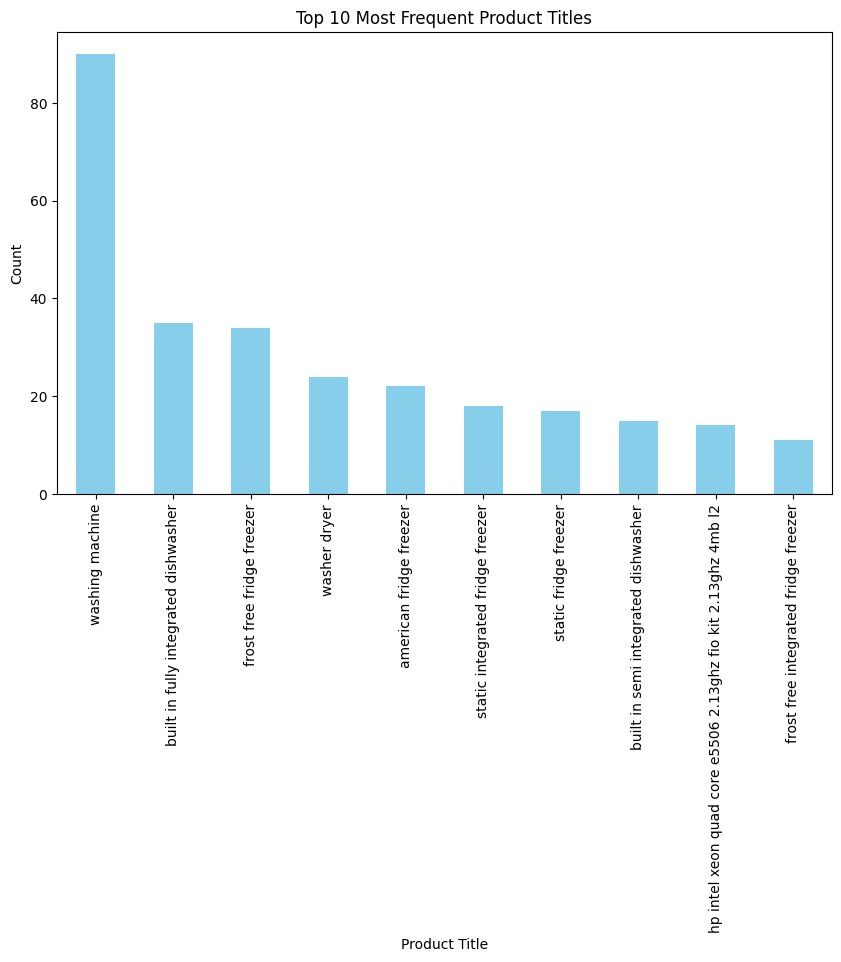

In [11]:
# Plotting the countplot
plt.figure(figsize=(10, 6))
Product.plot(kind='bar', color='skyblue') 
plt.title('Top 10 Most Frequent Product Titles')
plt.ylabel('Count')
plt.xlabel('Product Title')
plt.show()

In [12]:
Merchant=data[' Merchant ID'].value_counts(ascending=False).head(10)
Merchant

 Merchant ID
3      2547
6      1591
298    1523
31     1350
119    1239
7      1204
17     1193
293    1177
294    1000
301     901
Name: count, dtype: int64

In [13]:
data.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

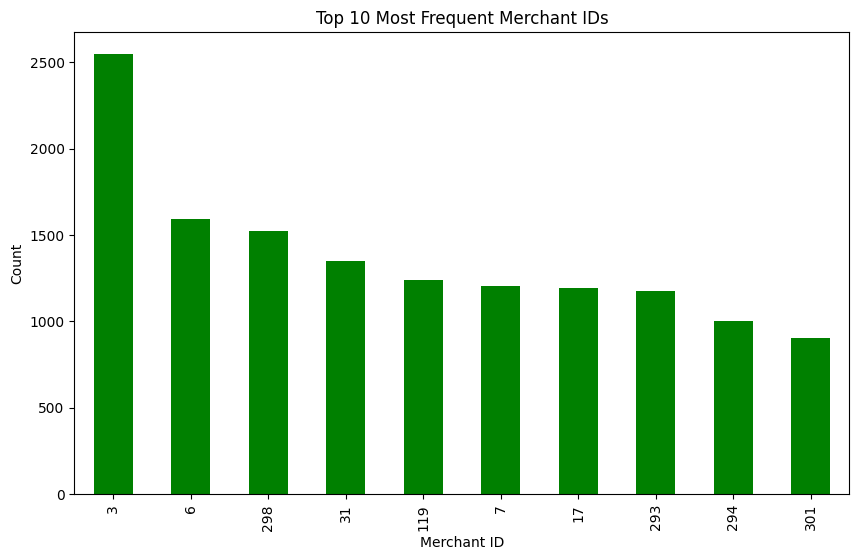

In [14]:
plt.figure(figsize=(10, 6))
Merchant.plot(kind='bar', color='green')
plt.title('Top 10 Most Frequent Merchant IDs')
plt.ylabel('Count')
plt.xlabel('Merchant ID')
plt.show()

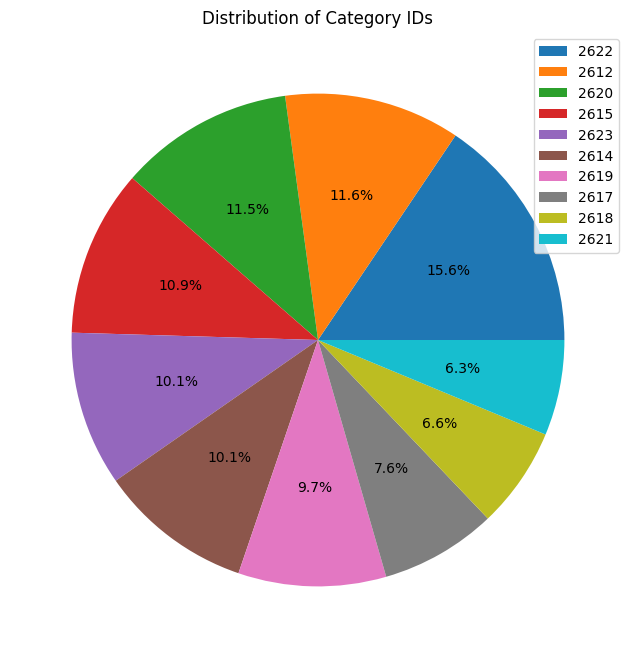

In [15]:
plt.figure(figsize=(8, 8))  # Adjusting the figure size
data[' Category ID'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)  # Adding percentage labels
plt.title('Distribution of Category IDs')
plt.ylabel('')  # Removing y-label
plt.legend(data[' Category ID'].value_counts().index, loc="best")  # Adding legend with category IDs
plt.show()

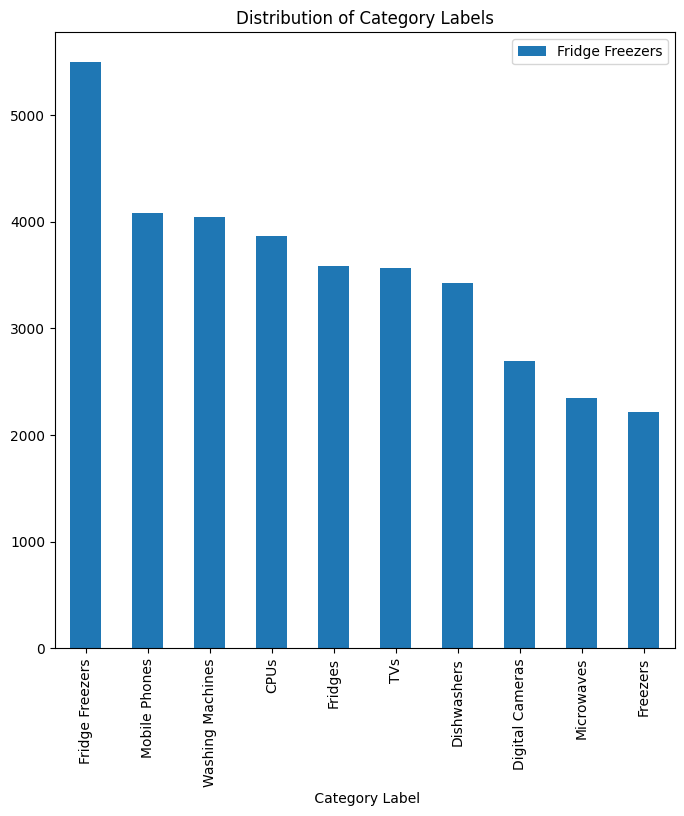

In [16]:
plt.figure(figsize=(8, 8))  # Adjusting the figure size
data[' Category Label'].value_counts().plot(kind='bar')  # Adding percentage labels
plt.title('Distribution of Category Labels')
plt.ylabel('')  # Removing y-label
plt.legend(data[' Category Label'].value_counts().index, loc="best")  # Adding legend with category IDs
plt.show()

# Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [18]:
# Convert categorical variables to numerical using label encoding
label_encoders = {}
for column in ['Product Title', ' Cluster Label', ' Category Label']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [19]:
# Split the data into features and target variables for classification
X = data[['Product Title', ' Merchant ID', ' Category ID']]
y = data[' Category Label']


In [20]:
# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Train a classification model (Random Forest classifier)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred=classifier.predict(X_test)

In [23]:
# Evaluate the classification model
accuracy = classifier.score(X_test, y_test)
print("Classification Accuracy:", accuracy)


Classification Accuracy: 1.0


In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       771
           1       1.00      1.00      1.00       542
           2       1.00      1.00      1.00       662
           3       1.00      1.00      1.00       439
           4       1.00      1.00      1.00      1115
           5       1.00      1.00      1.00       728
           6       1.00      1.00      1.00       469
           7       1.00      1.00      1.00       818
           8       1.00      1.00      1.00       723
           9       1.00      1.00      1.00       796

    accuracy                           1.00      7063
   macro avg       1.00      1.00      1.00      7063
weighted avg       1.00      1.00      1.00      7063



# Perform product clustering

In [25]:
# Select features for clustering
X_clustering = data[['Product Title', ' Merchant ID', ' Cluster ID']]

In [26]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters
clusters = kmeans.fit_predict(X_clustering)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
clusters

array([2, 2, 2, ..., 3, 4, 0], dtype=int32)

In [28]:
# Add cluster labels to the dataset
data['Cluster'] = clusters

In [29]:
data

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label,Cluster
0,1,2561,1,1,909,2612,7,2
1,2,2559,2,1,909,2612,7,2
2,3,2656,3,1,909,2612,7,2
3,4,2563,4,1,909,2612,7,2
4,5,2565,5,1,909,2612,7,2
...,...,...,...,...,...,...,...,...
35306,47350,27084,59,47517,11152,2623,5,3
35307,47351,27083,59,47518,11154,2623,5,3
35308,47352,27082,59,47519,11153,2623,5,3
35309,47355,6918,125,47524,2685,2623,5,4


In [30]:
data.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label', 'Cluster'],
      dtype='object')